In [1]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
from datetime import datetime

FOLDER = 'out'

In [2]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out: 36


In [3]:

compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    summary = {
        'size': res_full['train_size'],
        #'representation': res_full['data_summary']['representation'],
        'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true'])),
        'test_size': len(res['all_y_true'])
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)
print(compiled_res_list)

[{'size': 13, 'target': 'yield_bin', 'accuracy': 0.3333333333333333, 'f1_macro': 0.25, 'f1_micro': 0.3333333333333333, 'kappa': 0.0, 'num_epochs': 50, 'lr': 3e-05, 'bins': 2, 'test_size': 3}, {'size': 5, 'target': 'yield_bin', 'accuracy': 0.0, 'f1_macro': 0.0, 'f1_micro': 0.0, 'kappa': 0.0, 'num_epochs': 10, 'lr': 0.0003, 'bins': 2, 'test_size': 11}, {'size': 13, 'target': 'yield_bin', 'accuracy': 0.6666666666666666, 'f1_macro': 0.6666666666666666, 'f1_micro': 0.6666666666666666, 'kappa': 0.39999999999999997, 'num_epochs': 50, 'lr': 3e-05, 'bins': 2, 'test_size': 3}, {'size': 10, 'target': 'yield_bin', 'accuracy': 0.0, 'f1_macro': 0.0, 'f1_micro': 0.0, 'kappa': 0.0, 'num_epochs': 10, 'lr': 0.0003, 'bins': 2, 'test_size': 6}, {'size': 5, 'target': 'yield_bin', 'accuracy': 0.45454545454545453, 'f1_macro': 0.3125, 'f1_micro': 0.45454545454545453, 'kappa': 0.0, 'num_epochs': 50, 'lr': 0.0003, 'bins': 2, 'test_size': 11}, {'size': 10, 'target': 'yield_bin', 'accuracy': 0.0, 'f1_macro': 0.0,

In [4]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['bins', 'num_epochs', 'target', 'size']).agg(['mean', 'sem'])


In [5]:
grouped_res


accuracy            f1_macro            \
                                    mean       sem      mean       sem   
bins num_epochs target    size                                           
2    10         yield_bin 5     0.000000  0.000000  0.000000  0.000000   
                          10    0.000000  0.000000  0.000000  0.000000   
                          13    0.000000  0.000000  0.000000  0.000000   
     25         yield_bin 5     0.000000  0.000000  0.000000  0.000000   
                          10    0.000000  0.000000  0.000000  0.000000   
                          13    0.333333  0.192450  0.216667  0.116667   
     50         yield_bin 5     0.454545  0.052486  0.322156  0.086280   
                          10    0.444444  0.055556  0.384127  0.050794   
                          13    0.444444  0.074911  0.327778  0.060904   

                                f1_micro               kappa            \
                                    mean       sem      mean       sem   
bins num_epochs target    size                                           
2    10         yield_bin 5     0.000000  0.000000  0.000000  0.000000   
                          10    0.000000  0.000000  0.000000  0.000000   
                          13    0.000000  0.000000  0.000000  0.000000   
     25         yield_bin 5     0.000000  0.000000  0.000000  0.000000   
                          10    0.000000  0.000000  0.000000  0.000000   
                          13    0.333333  0.192450 -0.433333  0.233333   
     50         yield_bin 5     0.454545  0.052486 -0.029363  0.115192   
                          10    0.444444  0.055556 -0.111111  0.111111   
                          13    0.444444  0.074911 -0.066667  0.108246   

                                      lr           test_size       
                                    mean       sem      mean  sem  
bins num_epochs target    size                                     
2    10         yield_bin 5     0.000300  0.000000      11.0  0.0  
                          10    0.000300  0.000000       6.0  0.0  
                          13    0.000300  0.000000       3.0  0.0  
     25         yield_bin 5     0.000300  0.000000      11.0  0.0  
                          10    0.000300  0.000000       6.0  0.0  
                          13    0.000300  0.000000       3.0  0.0  
     50         yield_bin 5     0.000300  0.000000      11.0  0.0  
                          10    0.000300  0.000000       6.0  0.0  
                          13    0.000182  0.000036       3.0  0.0

/home/jorenvanherck/.local/lib/python3.10/site-packages/matplotlib/ticker.py:2954: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/home/jorenvanherck/.local/lib/python3.10/site-packages/matplotlib/ticker.py:2954: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


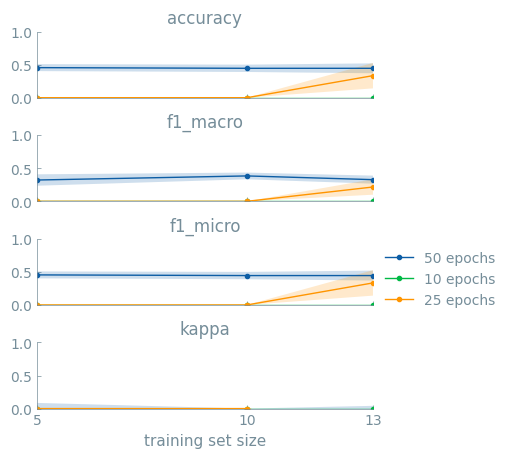

In [7]:
from scipy.stats import sem
from scipy.constants import golden
import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

ONE_COL_WIDTH_INCH = 5
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'yield_bin'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH),constrained_layout = True , sharex=True)
 
for num_epochs in compiled_res['num_epochs'].unique():
    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index, 
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'],
            marker='o',
            label=f'{num_epochs} epochs'
        )
        ax[i].fill_between(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index,
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            alpha=0.2
        )
        ax[i].set_ylim(0,1)
        ax[i].set_title(metric)
        ax[i].set_xticks((list(compiled_res['size'].unique())))
    #ylabel_top('accuracy', ax=ax[0])
    #ylabel_top(r'F$_1$ macro', ax=ax[1])
    #ylabel_top(r'F$_1$ micro', ax=ax[2])
    #ylabel_top(r'$\kappa$', ax=ax[3])
ax[-1].set_xlabel('training set size')


#matplotx.line_labels(ax[0])
now = datetime.now().strftime('%Y%m%d_%H%M') 
#fig.suptitle('Isomerisation - {} - {}'.format(REPRESENTATION, 'binary'), fontsize=16)
ax[-2].legend(bbox_to_anchor=(1,1))

fig.savefig(f'Isomerisation-{REPRESENTATION}-binary-{BINS}bin-classification-results.pdf', bbox_inches='tight')